In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.offline as py
py.init_notebook_mode(connected=True)
%matplotlib inline

In [29]:
global_temp = pd.read_csv('GlobalTemperatures.csv')
global_temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
global_temp_dt = global_temp[['dt','LandAverageTemperature']]
global_temp_dt = global_temp_dt[global_temp_dt.LandAverageTemperature.notnull()]
global_temp_dt = global_temp_dt.reset_index(drop=True)
global_temp_dt.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


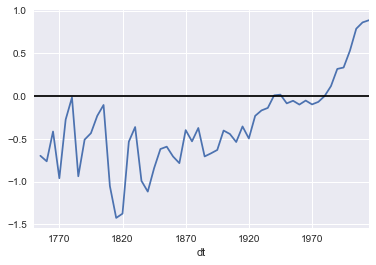

In [31]:
global_temp_dt = global_temp_dt.set_index(['dt'])
global_temp_dt.index = pd.to_datetime(global_temp_dt.index)
global_temp_dt_decade = global_temp_dt.resample("5A").mean()
global_temp_dt_decade['diff'] = global_temp_dt_decade.LandAverageTemperature.diff(1)
global_temp_dt_decade['diff'].cumsum().plot()
plt.axhline(0, color='k')

### We noticed that the temperature increases since 1970. 
### In this case, I will set up a null hypothesis and a alternative hypothesis.
#### Null hypothesis - the temperature does not increase since 1970.
#### Alternative hypothesis - the temperature does increase since 1970.

In [32]:
global_temp_dt_1970 = global_temp_dt[global_temp_dt.index.year >= 1970]
global_temp_dt_1970 = global_temp_dt_1970.resample("A").mean()
global_temp_dt_1970.head()

,LandAverageTemperature
dt,
1970-12-31,8.700917
1971-12-31,8.599250
1972-12-31,8.499583
1973-12-31,8.948250
1974-12-31,8.467500


### Calculating the sample statistics (mean and std)

In [33]:
mean_y = global_temp_dt_1970.LandAverageTemperature.mean()
std_y = global_temp_dt_1970.LandAverageTemperature.std() / np.sqrt(len(global_temp_dt_1970.LandAverageTemperature))

In [34]:
global_temp_dt_year = global_temp_dt.resample("A").mean()
mean_y_all = global_temp_dt_year.LandAverageTemperature.mean()

### Calculating the Z value

In [35]:
z = abs(mean_y - mean_y_all) / std_y
z

13.180346590460584

### I found that the Z value is much higher than the critical Z value (2.33 for a = 0.01), so I am going to reject the null hypothesis.